<a href="https://colab.research.google.com/github/harshitha020505/DLLAB/blob/main/DLLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implement an MLP by varying bias, weights, and learning rate, and record observations for different
#learning rate values. Plot a graph showing the relationship between loss (error) and learning rate.

Learning Rate: 0.01, Final Loss: 0.240571
Learning Rate: 0.05, Final Loss: 0.012541
Learning Rate: 0.1, Final Loss: 0.002546
Learning Rate: 0.5, Final Loss: 0.000293
Learning Rate: 1.0, Final Loss: 0.000135


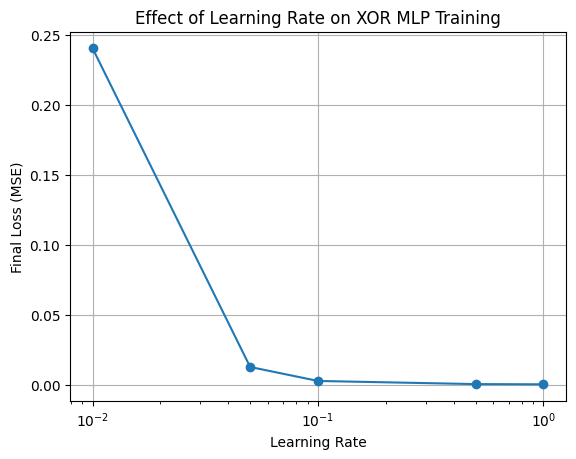

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
  return x*(1-x)
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])
learning_rates=[0.01, 0.05, 0.1, 0.5, 1.0]
final_losses=[]
epochs=10000
for lr in learning_rates:
  np.random.seed(42)
  W1 = np.random.rand(2, 2)
  b1 = np.random.rand(1, 2)
  W2 = np.random.rand(2, 1)
  b2 = np.random.rand(1, 1)
  for epoch in range(epochs):
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)
    error = y - y_pred
    loss = np.mean(error ** 2)
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr

    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr
  final_losses.append(loss)
  print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")
plt.figure()
plt.plot(learning_rates, final_losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [7]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()
X_train_full = X_train_full / 255.0
X_test_full = X_test_full / 255.0
X_train_full = X_train_full.reshape(-1, 28*28)
X_test_full = X_test_full.reshape(-1, 28*28)
X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42
)


mlp1 = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=50,
    random_state=1
)

mlp1.fit(X_train, y_train)

print("Experiment 1")
print("Training Accuracy:", mlp1.score(X_train, y_train))
print("Testing Accuracy:", mlp1.score(X_test, y_test))


mlp2 = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=200,
    random_state=1
)

mlp2.fit(X_train, y_train)

print("\nExperiment 2 (More Iterations)")
print("Training Accuracy:", mlp2.score(X_train, y_train))
print("Testing Accuracy:", mlp2.score(X_test, y_test))



mlp3 = MLPClassifier(
    hidden_layer_sizes=(50,),
    solver='sgd',
    learning_rate_init=0.01,
    max_iter=200,
    random_state=1
)

mlp3.fit(X_train, y_train)

print("\nExperiment 3 (Higher Learning Rate + SGD)")
print("Training Accuracy:", mlp3.score(X_train, y_train))
print("Testing Accuracy:", mlp3.score(X_test, y_test))


mlp4 = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=200,
    random_state=1
)

mlp4.fit(X_train, y_train)

print("\nExperiment 4 (More Neurons)")
print("Training Accuracy:", mlp4.score(X_train, y_train))
print("Testing Accuracy:", mlp4.score(X_test, y_test))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Experiment 1
Training Accuracy: 0.9992708333333333
Testing Accuracy: 0.9699166666666666

Experiment 2 (More Iterations)
Training Accuracy: 1.0
Testing Accuracy: 0.97075


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Experiment 3 (Higher Learning Rate + SGD)
Training Accuracy: 0.9998125
Testing Accuracy: 0.9695833333333334

Experiment 4 (More Neurons)
Training Accuracy: 1.0
Testing Accuracy: 0.9783333333333334


Iteration 1, loss = 0.56769073
Iteration 2, loss = 0.27183542
Iteration 3, loss = 0.22447868
Iteration 4, loss = 0.19207666
Iteration 5, loss = 0.16704424
Iteration 6, loss = 0.14697807
Iteration 7, loss = 0.13077675
Iteration 8, loss = 0.11781429
Iteration 9, loss = 0.10745284
Iteration 10, loss = 0.09785354
Iteration 11, loss = 0.08990115
Iteration 12, loss = 0.08365900
Iteration 13, loss = 0.07678517
Iteration 14, loss = 0.07186650
Iteration 15, loss = 0.06663250
Iteration 16, loss = 0.06312399
Iteration 17, loss = 0.05853492
Iteration 18, loss = 0.05446016
Iteration 19, loss = 0.05162915
Iteration 20, loss = 0.04843757
Iteration 21, loss = 0.04486590
Iteration 22, loss = 0.04324448
Iteration 23, loss = 0.04021691
Iteration 24, loss = 0.03802935
Iteration 25, loss = 0.03598143
Iteration 26, loss = 0.03377768
Iteration 27, loss = 0.03138942
Iteration 28, loss = 0.02981617
Iteration 29, loss = 0.02773513
Iteration 30, loss = 0.02629577
Iteration 31, loss = 0.02549491
Iteration 32, los

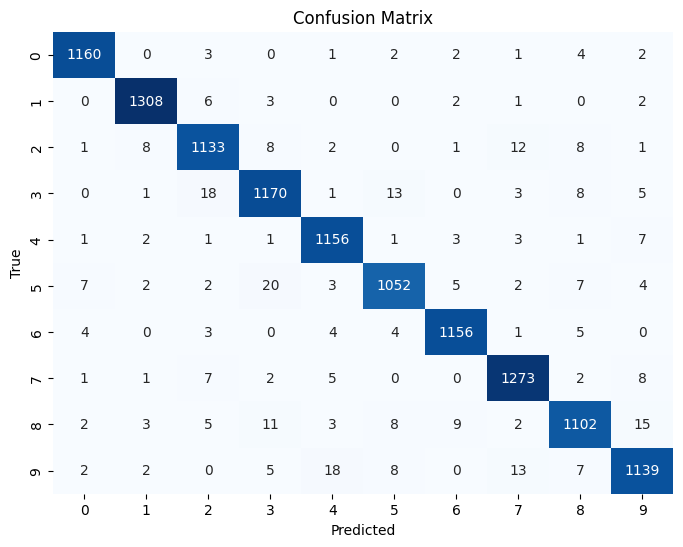

Iteration 1, loss = 0.67655899
Iteration 2, loss = 0.39594203
Iteration 3, loss = 0.40129192
Iteration 4, loss = 0.39237861
Iteration 5, loss = 0.39837001
Iteration 6, loss = 0.43461433
Iteration 7, loss = 0.41242857
Iteration 8, loss = 0.42878660
Iteration 9, loss = 0.42274412
Iteration 10, loss = 0.41525394
Iteration 11, loss = 0.40147740
Iteration 12, loss = 0.46689057
Iteration 13, loss = 0.49140009
Iteration 14, loss = 0.49680110
Iteration 15, loss = 0.44166261
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score (MLP2): 0.9208125
Testing set score (MLP2): 0.9080833333333334


In [8]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
(X_train_full,y_train_full),(X_test_full,y_test_full)=mnist.load_data()
X_train_full=X_train_full/255.0
X_test_full=X_test_full/255.0
X_train_full=X_train_full.reshape(-1,28*28)
X_test_full=X_test_full.reshape(-1,28*28)
X_train,X_test,y_train,y_test=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)
mlp=MLPClassifier(hidden_layer_sizes=(50,),max_iter=100,verbose=1,random_state=1)
mlp.fit(X_train,y_train)
print("Training set score:", mlp.score(X_train, y_train))
print("Testing set score:", mlp.score(X_test, y_test))
index = 346
test_digit = X_test[index].reshape(1, 784)

prediction = mlp.predict(test_digit)[0]

print("Predicted value:", prediction)
print("Actual value:", y_test[index])

# =========================
# Confusion Matrix
# =========================
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

preds = mlp.predict(X_test)

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
mlp2 = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=50,
    verbose=1,
    random_state=1,
    learning_rate_init=0.1
)

mlp2.fit(X_train, y_train)

print("Training set score (MLP2):", mlp2.score(X_train, y_train))
print("Testing set score (MLP2):", mlp2.score(X_test, y_test))

